# Lets create some nice visualisations!

## Investigation Overview

In this investigation, we wanted to build some meaningfuil visualisations! Columns in scope were:



## Dataset Overview

This ProsperLoan data set contains 113937 rows and 81 columns, each row being one loan. Columns in scope are:

        - 'LoanStatus': shows *current* or *completed*
        - 'EstimatedEffectiveYield': effective yield is a financial metric that measures the interest rate
        - 'BorrowerAPR': annual percentage range
        - 'BorrowerRate': the interest rate at which money may be borrowed
        - 'ProsperScore': prosper score estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination. One is the worst, 11 the best score.               
        - 'EmploymentStatus': describes status of employment (e.g. full-time, part-time) 
        - 'Occupation': occuption of the person
        - 'IsBorrowerHomeowner': homeowner True or False
        - 'IncomeVerifiable': income verifieable True or False
        - 'StatedMonthlyIncome': stated income
        - 'MonthlyLoanPayment': monthly loan payment
        - 'Recommendations', 
        - 'DebtToIncomeRatio': Debt divided by income
        - 'LoanOriginalAmount' Original amount of the loan
        - 'PercentFunded': percentage of loan funded
        - 'IncomeRange': Income range of people
        - 'BorrowerState: state where the borrower ist from


# Preliminary Wrangling

What is the structure of this dataset?

shape: 113937 rows, 17 columns

Numerical columns are: 

- BorrowerAPR
- BorrowerRate
- EstimatedEffectiveYield
- ProsperScore
- DebtToIncomeRatio
- StatedMonthlyIncome
- LoanOriginalAmount
- MonthlyLoanPayment
- PercentFunded

categorical columns are:

- LoanStatus
- BorrowerState	
- Occupation	
- EmploymentStatus	


### Load packages

In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

### Read the data

In [4]:
df = pd.read_csv('prosperLoanData.csv', usecols= ['Term', 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperScore',                     
        'EmploymentStatus',
        'Occupation',  
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'BorrowerState']
)
df.head(3)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperScore,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
0,36,Completed,0.16516,0.158,NaN,NaN,CO,Other,Self-employed,True,0.17,"$25,000-49,999",True,3083.333333,9425,330.43,1.0
1,36,Current,0.12016,0.092,0.0796,7.0,CO,Professional,Employed,False,0.18,"$50,000-74,999",True,6125.000000,10000,318.93,1.0
2,36,Completed,0.28269,0.275,NaN,NaN,GA,Other,Not available,False,0.06,Not displayed,True,2083.333333,3001,123.32,1.0


In [5]:
df.shape

(113937, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerAPR              113912 non-null  float64
 3   BorrowerRate             113937 non-null  float64
 4   EstimatedEffectiveYield  84853 non-null   float64
 5   ProsperScore             84853 non-null   float64
 6   BorrowerState            108422 non-null  object 
 7   Occupation               110349 non-null  object 
 8   EmploymentStatus         111682 non-null  object 
 9   IsBorrowerHomeowner      113937 non-null  bool   
 10  DebtToIncomeRatio        105383 non-null  float64
 11  IncomeRange              113937 non-null  object 
 12  IncomeVerifiable         113937 non-null  bool   
 13  StatedMonthlyIncome      113937 non-null  float64
 14  Loan

* since this project is about visualisation, lets drop all null-values to make our lifes simpler

In [7]:
df = df.dropna()

In [8]:
#convert term into category
df['Term'] = df['Term'].astype('category')

In [9]:
df

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperScore,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,36,Current,0.12016,0.0920,0.07960,7.0,CO,Professional,Employed,False,0.18,"$50,000-74,999",True,6125.000000,10000,318.93,1.0
3,36,Current,0.12528,0.0974,0.08490,9.0,GA,Skilled Labor,Employed,True,0.15,"$25,000-49,999",True,2875.000000,10000,321.45,1.0
4,36,Current,0.24614,0.2085,0.18316,4.0,MN,Executive,Employed,True,0.26,"$100,000+",True,9583.333333,15000,563.97,1.0
5,60,Current,0.15425,0.1314,0.11567,10.0,NM,Professional,Employed,True,0.36,"$100,000+",True,8333.333333,15000,342.37,1.0
6,36,Current,0.31032,0.2712,0.23820,2.0,KS,Sales - Retail,Employed,False,0.27,"$25,000-49,999",True,2083.333333,3000,122.67,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,0.1864,0.16490,5.0,IL,Food Service Management,Employed,True,0.13,"$50,000-74,999",True,4333.333333,10000,364.74,1.0
113933,36,FinalPaymentInProgress,0.13220,0.1110,0.10070,8.0,PA,Professional,Employed,True,0.11,"$75,000-99,999",True,8041.666667,2000,65.57,1.0
113934,60,Current,0.23984,0.2150,0.18828,3.0,TX,Other,Employed,True,0.51,"$25,000-49,999",True,2875.000000,10000,273.35,1.0
113935,60,Completed,0.28408,0.2605,0.24450,5.0,GA,Food Service,Full-time,True,0.48,"$25,000-49,999",True,3875.000000,15000,449.55,1.0


* data looks good now, no null values.

#### Identify the type of variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Term                     76224 non-null  category
 1   LoanStatus               76224 non-null  object  
 2   BorrowerAPR              76224 non-null  float64 
 3   BorrowerRate             76224 non-null  float64 
 4   EstimatedEffectiveYield  76224 non-null  float64 
 5   ProsperScore             76224 non-null  float64 
 6   BorrowerState            76224 non-null  object  
 7   Occupation               76224 non-null  object  
 8   EmploymentStatus         76224 non-null  object  
 9   IsBorrowerHomeowner      76224 non-null  bool    
 10  DebtToIncomeRatio        76224 non-null  float64 
 11  IncomeRange              76224 non-null  object  
 12  IncomeVerifiable         76224 non-null  bool    
 13  StatedMonthlyIncome      76224 non-null  float64 
 14  LoanO

we have various integers and float columns. We could simply do a list for filtering, but we can also do it more elegantly with df.select_dtypes

In [11]:
#Numerical attributes
df.select_dtypes(include=["int64", "float64"])

,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,0.12016,0.0920,0.07960,7.0,0.18,6125.000000,10000,318.93,1.0
3,0.12528,0.0974,0.08490,9.0,0.15,2875.000000,10000,321.45,1.0
4,0.24614,0.2085,0.18316,4.0,0.26,9583.333333,15000,563.97,1.0
5,0.15425,0.1314,0.11567,10.0,0.36,8333.333333,15000,342.37,1.0
6,0.31032,0.2712,0.23820,2.0,0.27,2083.333333,3000,122.67,1.0
...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,0.16490,5.0,0.13,4333.333333,10000,364.74,1.0
113933,0.13220,0.1110,0.10070,8.0,0.11,8041.666667,2000,65.57,1.0
113934,0.23984,0.2150,0.18828,3.0,0.51,2875.000000,10000,273.35,1.0
113935,0.28408,0.2605,0.24450,5.0,0.48,3875.000000,15000,449.55,1.0


In [12]:
#Categorical attributes
df.select_dtypes(include=["object", "category"])

,Term,LoanStatus,BorrowerState,Occupation,EmploymentStatus,IncomeRange
1,36,Current,CO,Professional,Employed,"$50,000-74,999"
3,36,Current,GA,Skilled Labor,Employed,"$25,000-49,999"
4,36,Current,MN,Executive,Employed,"$100,000+"
5,60,Current,NM,Professional,Employed,"$100,000+"
6,36,Current,KS,Sales - Retail,Employed,"$25,000-49,999"
...,...,...,...,...,...,...
113932,36,Current,IL,Food Service Management,Employed,"$50,000-74,999"
113933,36,FinalPaymentInProgress,PA,Professional,Employed,"$75,000-99,999"
113934,60,Current,TX,Other,Employed,"$25,000-49,999"
113935,60,Completed,GA,Food Service,Full-time,"$25,000-49,999"


## Univariate Exploration

> In this section, we investigate distributions of individual variables. 

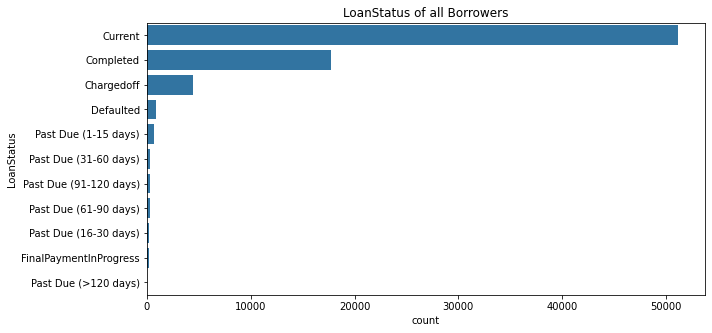

In [13]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = df, y = 'LoanStatus', color = base_color,
             order = df['LoanStatus'].value_counts().index);

Looks like the dominant Loanstatus is *current*

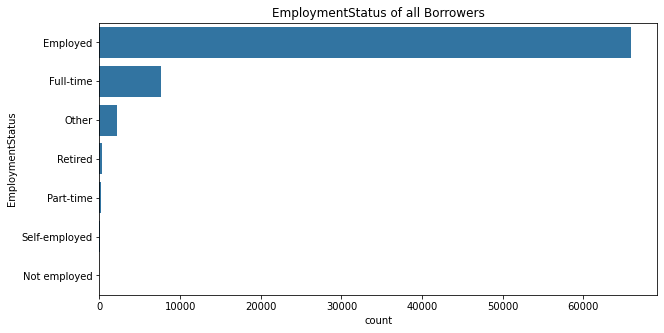

In [14]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = df, y = 'EmploymentStatus', color = base_color,
             order = df['EmploymentStatus'].value_counts().index);

Majority of people are employed or full-time

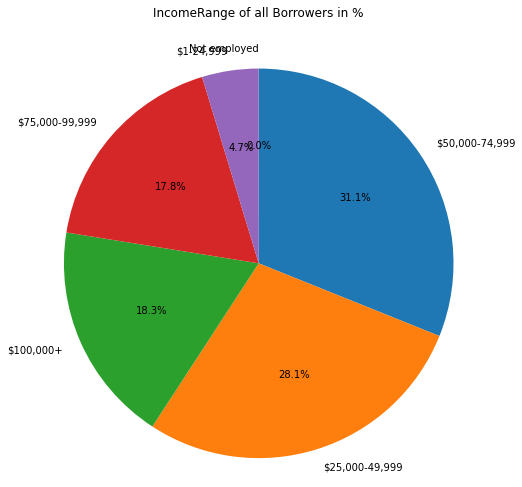

In [61]:
plt.figure(figsize = [15, 8])
sorted_counts = df['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, 
        wedgeprops = {'width' : 1}, 
        autopct   = '%.1f%%'
        ),
plt.title("IncomeRange of all Borrowers in %", y = 1.05)
plt.axis('square');
plt.axis(

blue, 31%: majority of people earn $50000-74999 dollars

Text(0.5, 1.0, 'ProsperScore of all Borrowers')

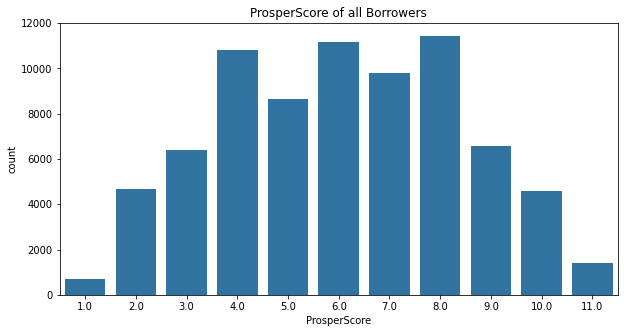

In [16]:
#'ProsperScore'
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df, x = 'ProsperScore', color = base_color)
plt.title("ProsperScore of all Borrowers")

This looks like a normal disrbution

In [17]:
print(df.shape)
df.loc[df["StatedMonthlyIncome"]< 20000].shape

(76224, 17)


(75367, 17)

as you can see, the majority of people (75359/76216) have a StatedMonthlyIncome of below 20000. Above, there are few people with a wide range of high incomes. For a histogramm, it is nicer to look at the  StatedMonthlyIncome  below 20000

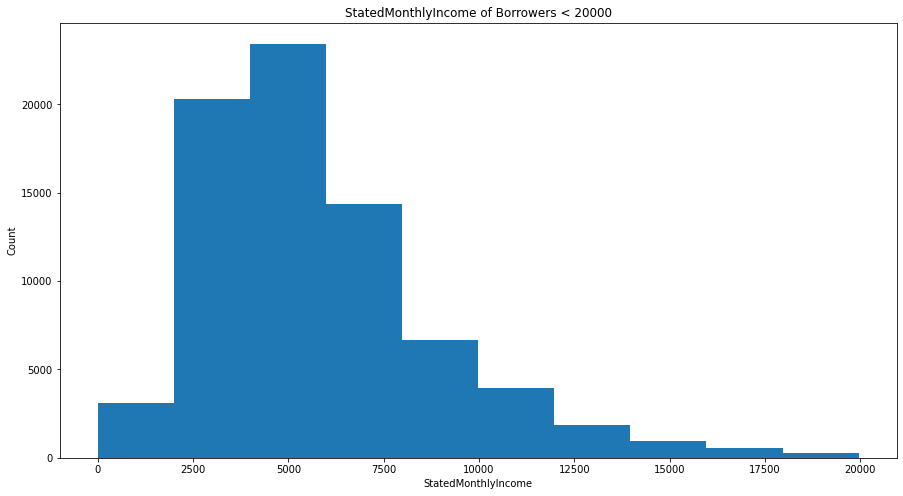

In [18]:
plt.figure(figsize = [15, 8])
df_sub = df.loc[df["StatedMonthlyIncome"]< 20000]
plt.hist(data = df_sub, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of Borrowers < 20000") ;

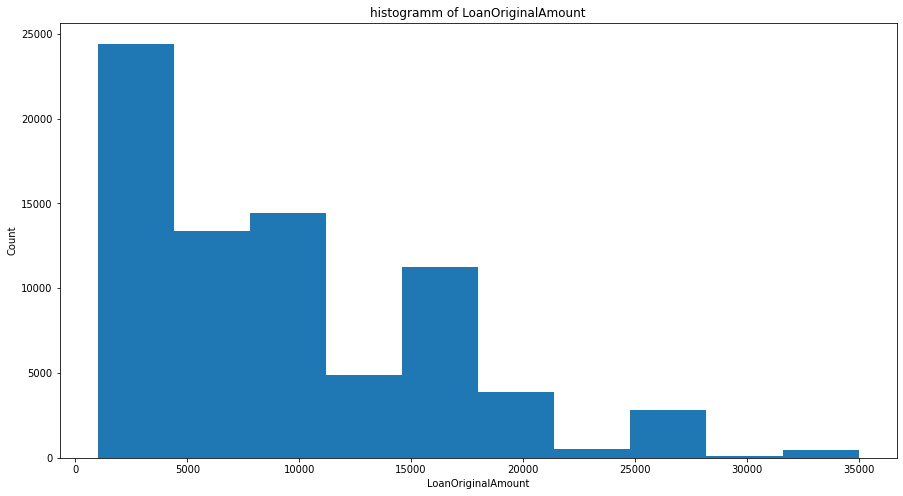

In [19]:
plt.figure(figsize = [15, 8])
plt.hist(data = df, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title("histogramm of LoanOriginalAmount") ;

### Insights Univariate Exploration

* **EmploymentStatus** majority of people work full time
* **IncomeRange**: 31% of people earn $50000-74999 dollars
* **ProsperScore**: normal distribution

* **StatedMonthlyIncome:**	
 Monthly Income is right skewed: very few people be have a higher salary. Majority of the borrowers are having a salary with less than 10000 USD and, peak is observed at 5000 USD

* **LoanOriginalAmount:** Right skewed with multiple peaks observed around 4000 USD, 10000 USD and 17000 USD.

* **Investors:** Majority of the investors are between 0 and 100

### Bivariate Exploration

In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

#### Relationship between two numeric variables

In [20]:
numeric_vars = df.select_dtypes(include=["int64", "float64"])


In [21]:
numeric_vars

,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded
1,0.12016,0.0920,0.07960,7.0,0.18,6125.000000,10000,318.93,1.0
3,0.12528,0.0974,0.08490,9.0,0.15,2875.000000,10000,321.45,1.0
4,0.24614,0.2085,0.18316,4.0,0.26,9583.333333,15000,563.97,1.0
5,0.15425,0.1314,0.11567,10.0,0.36,8333.333333,15000,342.37,1.0
6,0.31032,0.2712,0.23820,2.0,0.27,2083.333333,3000,122.67,1.0
...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,0.16490,5.0,0.13,4333.333333,10000,364.74,1.0
113933,0.13220,0.1110,0.10070,8.0,0.11,8041.666667,2000,65.57,1.0
113934,0.23984,0.2150,0.18828,3.0,0.51,2875.000000,10000,273.35,1.0
113935,0.28408,0.2605,0.24450,5.0,0.48,3875.000000,15000,449.55,1.0


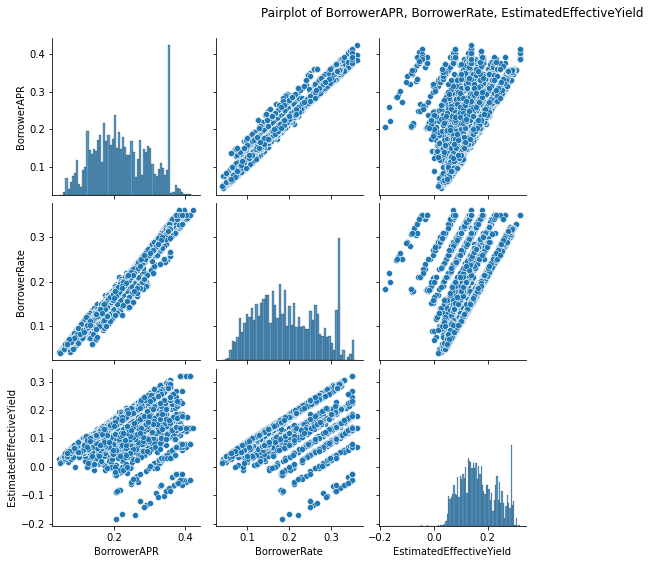

In [73]:
#g.fig.set_size_inches(14, 8);

sb.pairplot(numeric_vars[["BorrowerAPR", "BorrowerRate", "EstimatedEffectiveYield"]]);

plt.title("Pairplot of BorrowerAPR, BorrowerRate, EstimatedEffectiveYield", y = 3.2);

The diagonal plots show  marginal distribution of the data in each column.

These plots clearly show that BorrowerAPR, BorrowerRate and EstimatedEffectiveYield all correlate positive with each other

This just confirms what we have seen above

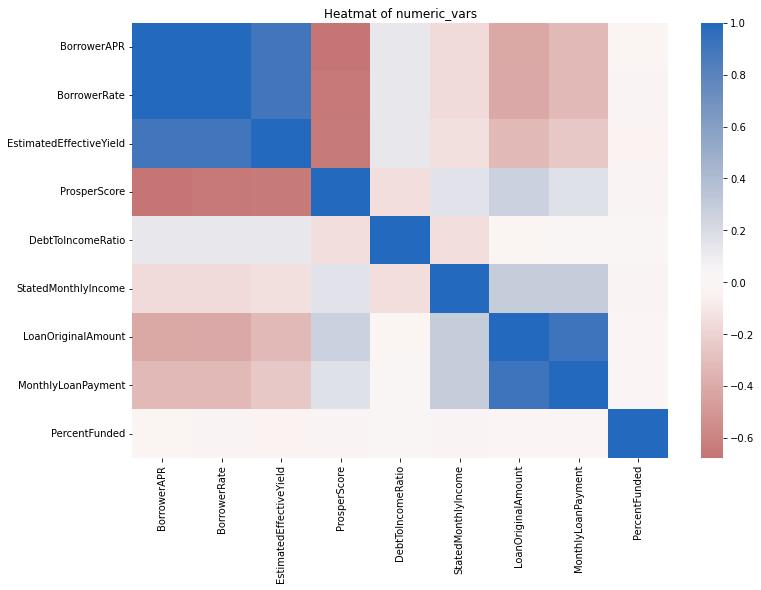

In [77]:
# correlation plot
plt.figure(figsize = [12, 8]);
sb.heatmap(numeric_vars.corr(), annot = False, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

plt.title("Heatmat of numeric_vars", y = 1);

A heatmap is a very powerful plot. We can easily identify columns that have a positive- & negative correlation or do not correlate at all.

Columns which have a positive correlation are for example:

- Borrower APR (annual percentage rate) & Borrower Rate have a positve correlation
- Borrower APR & EstimatedEffectedYield have a positive correlation


Borrower APR and ProsperRating_Numeric have a negative correlation. Borrower APR & ListCategory Numeric do not seem to correlate

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [24]:
pd.get_dummies(df["LoanStatus"]).columns

Index(['Chargedoff', 'Completed', 'Current', 'Defaulted',
       'FinalPaymentInProgress', 'Past Due (1-15 days)',
       'Past Due (16-30 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)'],
      dtype='object')

In [25]:
#df[pd.get_dummies(df["LoanStatus"]).columns] = pd.get_dummies(df["LoanStatus"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Term                     76224 non-null  category
 1   LoanStatus               76224 non-null  object  
 2   BorrowerAPR              76224 non-null  float64 
 3   BorrowerRate             76224 non-null  float64 
 4   EstimatedEffectiveYield  76224 non-null  float64 
 5   ProsperScore             76224 non-null  float64 
 6   BorrowerState            76224 non-null  object  
 7   Occupation               76224 non-null  object  
 8   EmploymentStatus         76224 non-null  object  
 9   IsBorrowerHomeowner      76224 non-null  bool    
 10  DebtToIncomeRatio        76224 non-null  float64 
 11  IncomeRange              76224 non-null  object  
 12  IncomeVerifiable         76224 non-null  bool    
 13  StatedMonthlyIncome      76224 non-null  float64 
 14  LoanO

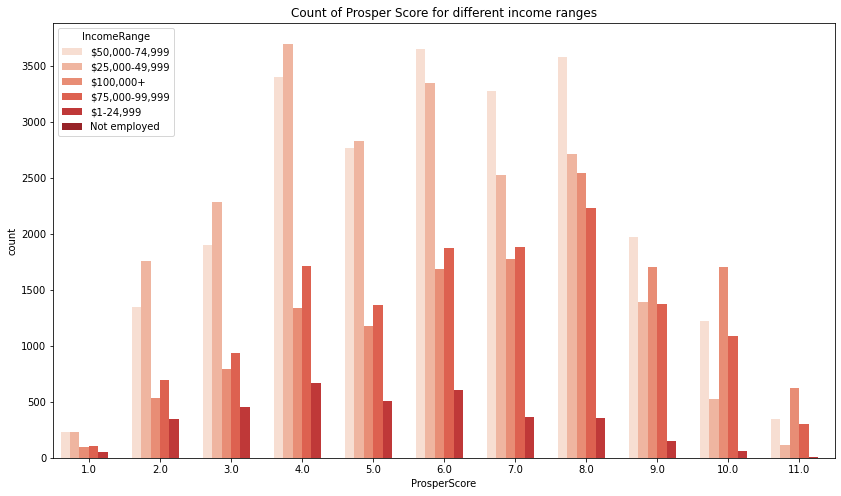

In [50]:
plt.figure(figsize=[14, 8]);
categoric_vars = ['EmploymentStatus', 'ProsperScore', 'IncomeRange'];

sb.countplot(data = df, x = 'ProsperScore', hue = 'IncomeRange', palette = 'Reds');
plt.title("Count of Prosper Score for different income ranges");


- prosper score estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination. One is the worst, 11 the best score.

- we can seee that "Not employed" practically never received an 11 (very good) which is not surprising. On the other hand, surprisingly a lot of people which a very high  income ($100000+) only received a 6 in their credit score. Also, a lot of people with a low income ($1-$24.999) got a credit score that is okay. This is most likely because the amount they loaned was rather low.

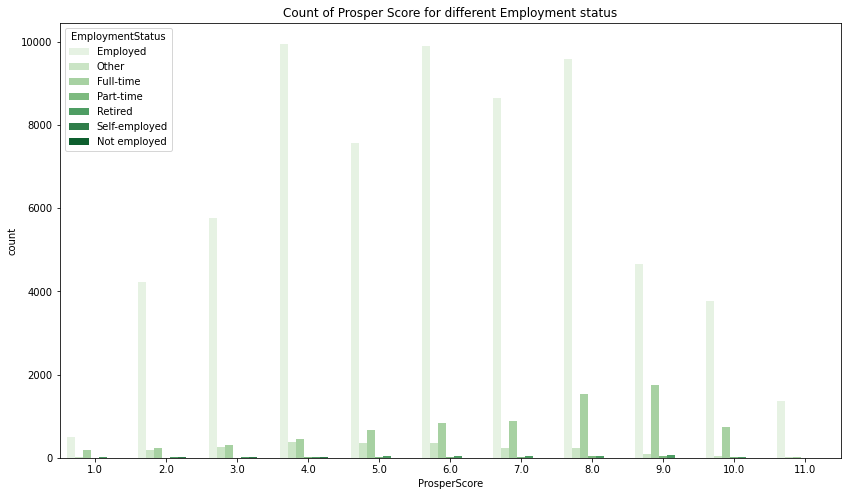

In [51]:
plt.figure(figsize=[14, 8]);
sb.countplot(data = df, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Greens');
plt.title("Count of Prosper Score for different Employment status");

The graph shows that the number of employed people dominate in all credit scores. This is simply because most people in the dataset are employed. On score 11, it is interesting that visibly, only employed people got that score. Some self-employed earn a lot of money but there are very few them, hence, not visible in the graph.

# Conclusions

* **EmploymentStatus** majority of people work full time
* **IncomeRange**: 31% of people earn $50000-74999 dollars
* **ProsperScore**: normal distribution

* **StatedMonthlyIncome:**	
 Monthly Income is right skewed: very few people be have a higher salary. Majority of the borrowers are having a salary with less than 10000 USD and, peak is observed at 5000 USD

* **LoanOriginalAmount:** Right skewed with multiple peaks observed around 4000 USD, 10000 USD and 17000 USD.

* **Investors:** Majority of the investors are between 0 and 100

Columns which have a positive correlation are for example:

- Borrower APR (annual percentage rate) & Borrower Rate have a positve correlation
- Borrower APR & EstimatedEffectedYield have a positive correlation


In [1]:
!jupyter nbconvert Explanatory_visualization_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt